In [13]:
from pynq import Overlay 
from pynq import allocate
from matplotlib import pyplot as plt
import time 
import cv2
import numpy as np


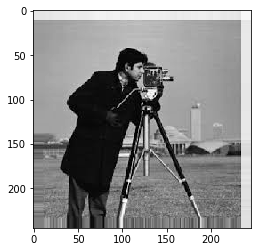

In [14]:
img = cv2.imread("img1.jfif")

img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

img_in = cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_REPLICATE)

plt.imshow(img_in, cmap="gray", vmin=0, vmax=255)
plt.show()

In [20]:
def validation(out, golden_output):

    with open(golden_output) as file:
        imgread = [line.split(' ') for line in file ]
    for i in imgread:
        del i[-1] 

    golden_output = np.array([[int(j)  for j in i] for i in imgread])

    if (golden_output.shape == out.shape):
        for row in range(0,len(out)):
            for col in range(0,len(out[0])):
                if (golden_output[row][col] != out[row][col]):
                    print("!!!!!Failed at the location [", row,",", col,"] !!!!!" )
                    return -1
        print("!!!!!Pass: The output matches the golden output!!!!!" )
    else:
        print("!!!!!Failed: sizes do not match!!!!!")

In [21]:
def run_Kernel(dma_in, dma_out, in_buffer, out_buffer):
    dma_in.sendchannel.transfer(in_buffer)
    dma_in.sendchannel.wait()
    dma_out.recvchannel.transfer(out_buffer)
    dma_out.recvchannel.wait()

In [22]:
def img_avg7(img):
    print("\nApplying Averaging Filter Size 7")
    overlay = Overlay('/home/xilinx/pynq/overlays/img_avg7/img_avg7.bit')
    dma_in = overlay.dma_read
    dma_out = overlay.dma_write
    
    in_buffer = allocate(shape=(245,245), dtype=np.int16, cacheable=1)
    out_buffer = allocate(shape=(225,225), dtype=np.int16, cacheable=1)
    in_buffer[:] = np.array(img.astype(np.int16))

    start_time = time.time()
    run_Kernel(dma_in, dma_out, in_buffer, out_buffer)
    end_time = time.time()-start_time

    out= np.array(out_buffer)
    plt.imshow(out,cmap="gray", vmin=0, vmax=255)
    plt.show()
    validation(out, '1_avg_7by7.txt')
    print('\nRuntime Average 7by7:', round(end_time,7), "s")


In [23]:
def img_avg21(img):
    print("\nApplying Averaging Filter Size 21")
    overlay = Overlay('/home/xilinx/pynq/overlays/img_avg21/img_avg21.bit')
    dma_in = overlay.dma_read
    dma_out = overlay.dma_write
    
    in_buffer = allocate(shape=(245,245), dtype=np.int16, cacheable=1)
    out_buffer = allocate(shape=(225,225), dtype=np.int16, cacheable=1)
    in_buffer[:] = np.array(img.astype(np.int16))

    start_time = time.time()
    run_Kernel(dma_in, dma_out, in_buffer, out_buffer)
    end_time = time.time()-start_time

    out= np.array(out_buffer)
    plt.imshow(out,cmap="gray", vmin=0, vmax=255)
    plt.show()
    validation(out, '1_avg_21by21.txt')
    print('\nRuntime Average 21by21:', round(end_time,7), "s")

In [24]:
def img_median7(img):
    print("\nApplying Median Filter Size 7")
    overlay = Overlay('/home/xilinx/pynq/overlays/img_median7/img_median7.bit')
    dma_in = overlay.dma_read
    dma_out = overlay.dma_write
    
    in_buffer = allocate(shape=(245,245), dtype=np.int16, cacheable=1)
    out_buffer = allocate(shape=(225,225), dtype=np.int16, cacheable=1)
    in_buffer[:] = np.array(img.astype(np.int16))

    start_time = time.time()
    run_Kernel(dma_in, dma_out, in_buffer, out_buffer)
    end_time = time.time()-start_time

    out= np.array(out_buffer)
    plt.imshow(out,cmap="gray", vmin=0, vmax=255)
    plt.show()
    validation(out, '1_median_7by7.txt')
    print('\nRuntime Median 7by7:', round(end_time,7), "s")

In [25]:
def img_median21(img):
    print("\nApplying Median Filter Size 21")
    overlay = Overlay('/home/xilinx/pynq/overlays/img_median21/img_median21.bit')
    dma_in = overlay.dma_read
    dma_out = overlay.dma_write
    
    in_buffer = allocate(shape=(245,245), dtype=np.int16, cacheable=1)
    out_buffer = allocate(shape=(225,225), dtype=np.int16, cacheable=1)
    in_buffer[:] = np.array(img.astype(np.int16))

    start_time = time.time()
    run_Kernel(dma_in, dma_out, in_buffer, out_buffer)
    end_time = time.time()-start_time

    out= np.array(out_buffer)
    plt.imshow(out,cmap="gray", vmin=0, vmax=255)
    plt.show()
    validation(out, '1_median_21by21.txt')
    print('\nRuntime Median 21by21:', round(end_time,7), "s")

Applying Averaging Filter Size 7


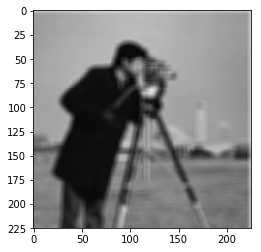

!!!!!Pass: The output matches the golden output!!!!!

Runtime Average 7by7: 0.0127208 s
Applying Averaging Filter Size 21


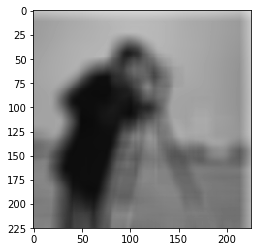

!!!!!Pass: The output matches the golden output!!!!!

Runtime Average 21by21: 0.1151838 s
Applying Median Filter Size 7


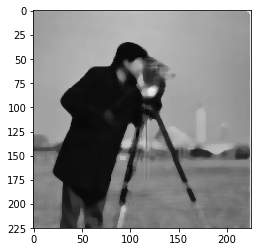

!!!!!Pass: The output matches the golden output!!!!!

Runtime Median 7by7: 1.0131338 s
Applying Median Filter Size 21


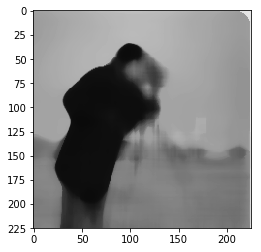

!!!!!Pass: The output matches the golden output!!!!!

Runtime Median 21by21: 79.0574331 s


In [26]:
img_avg7(img_in)
img_avg21(img_in)
img_median7(img_in)
img_median21(img_in)